DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Algorithm

 clustering algorithm widely used in data mining and machine learning. It is particularly useful for identifying clusters of arbitrary shape and handling noise in the data, making it a powerful alternative to traditional clustering algorithms like K-Means.

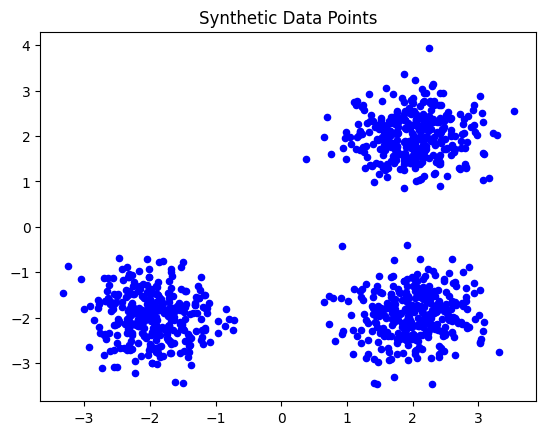

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data
# We'll create 3 clusters with random points
n_samples = 1000
centers = [[2, 2], [-2, -2], [2, -2]]
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5, random_state=42)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=20)
plt.title("Synthetic Data Points")
plt.show()



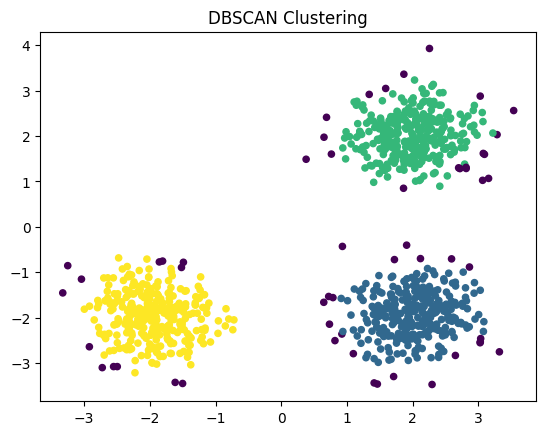

Cluster labels: [-1  0  1  2]


In [2]:
# Apply DBSCAN clustering
# eps: Maximum distance between two samples for them to be considered as neighbors.
# min_samples: Minimum number of samples (or total weight) in a neighborhood for a point to be considered a core point.
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', marker='o', s=20)
plt.title("DBSCAN Clustering")
plt.show()

# Show cluster labels (-1 is for noise)
print("Cluster labels:", np.unique(y_dbscan))


DBSCAN Anomaly detection example

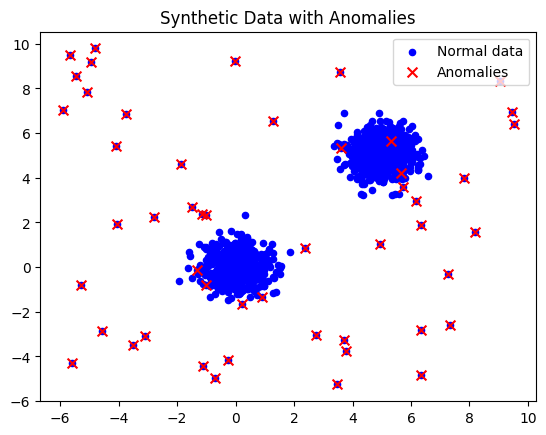

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data (normal points)
n_samples = 1000
centers = [[0, 0], [5, 5]]
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.6, random_state=42)

# Add some anomalies
np.random.seed(42)
anomalies = np.random.uniform(low=-6, high=10, size=(50, 2))
X = np.concatenate([X, anomalies], axis=0)

# Plot the generated data with anomalies
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=20, label="Normal data")
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', s=50, label="Anomalies")
plt.legend()
plt.title("Synthetic Data with Anomalies")
plt.show()



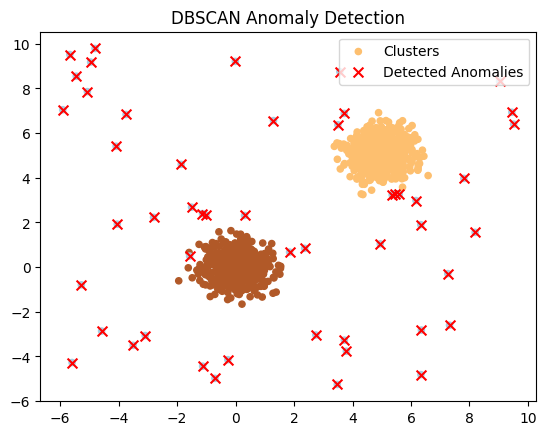

Number of anomalies detected: 50


In [5]:
# Apply DBSCAN for anomaly detection
# eps: Max distance for points to be considered as neighbors
# min_samples: Minimum number of points to form a dense cluster
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X)

# Label -1 indicates noise/anomalies detected by DBSCAN
anomalies_dbscan = X[labels == -1]

# Plot the DBSCAN clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', marker='o', s=20, label="Clusters")
plt.scatter(anomalies_dbscan[:, 0], anomalies_dbscan[:, 1], c='red', marker='x', s=50, label="Detected Anomalies")
plt.title("DBSCAN Anomaly Detection")
plt.legend()
plt.show()

# Print the number of anomalies detected
print(f"Number of anomalies detected: {len(anomalies_dbscan)}")


In [8]:
import numpy as np
from sklearn.cluster import DBSCAN

# Create 5 data points
data_points = np.array([[1, 2], [2, 2], [3, 3], [8, 8], [10, 10]])

# Apply DBSCAN to classify the points
dbscan = DBSCAN(eps=2.0, min_samples=2)
labels = dbscan.fit_predict(data_points)

# Print the data points and their labels (where -1 indicates anomaly)
for point, label in zip(data_points, labels):
    status = "Anomaly" if label == -1 else "Clustered"
    print(f"Point {point} is labeled as {status}.")


Point [1 2] is labeled as Clustered.
Point [2 2] is labeled as Clustered.
Point [3 3] is labeled as Clustered.
Point [8 8] is labeled as Anomaly.
Point [10 10] is labeled as Anomaly.
